In [1]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', 105)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
#warnings.filterwarnings("ignore")

from subprocess import check_output

In [2]:
def get_best_score(grid):
    
    best_score = np.sqrt(-grid.best_score_)
    print(best_score)    
    print(grid.best_params_)
    print(grid.best_estimator_)
    
    return best_score

In [3]:
def print_cols_large_corr(df, nr_c, targ) :
    corr = df.corr()
    corr_abs = corr.abs()
    print (corr_abs.nlargest(nr_c, targ)[targ])

In [4]:
def plot_corr_matrix(df, nr_c, targ) :
    
    corr = df.corr()
    corr_abs = corr.abs()
    cols = corr_abs.nlargest(nr_c, targ)[targ].index
    cm = np.corrcoef(df[cols].values.T)

    plt.figure(figsize=(nr_c/1.5, nr_c/1.5))
    sns.set(font_scale=1.25)
    sns.heatmap(cm, linewidths=1.5, annot=True, square=True, 
                fmt='.2f', annot_kws={'size': 10}, 
                yticklabels=cols.values, xticklabels=cols.values
               )
    plt.show()

In [5]:
df_train = pd.read_csv("dataset regionall.csv")
df_train.head()

,Daerah,provinsi,sumDesa,danadesa,tahun,miskin,miskin_perc,populasi,ipm,pdrb_tani,pdrb_growth
0,Kab. Lebak,Banten,340,53680341,2015,126.42,9.97,1268.004012,62.030000,4436.20,6.20
1,Kab. Pandeglang,Banten,326,51469974,2015,124.42,10.43,1192.905081,62.720000,5067.20,5.81
2,Kab. Serang,Banten,326,51469974,2015,74.85,5.09,1470.530452,64.610000,3954.27,5.09
3,Kab. Tangerang,Banten,246,38839306,2015,191.12,5.71,3347.110333,70.050000,4784.90,5.60
4,Kab. Bandung,Jawa Barat,270,54265335,2015,281.04,8.00,3513.000000,70.048031,4863.23,5.89


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 11 columns):
Daerah         340 non-null object
provinsi       340 non-null object
sumDesa        340 non-null int64
danadesa       340 non-null int64
tahun          340 non-null int64
miskin         340 non-null float64
miskin_perc    340 non-null float64
populasi       340 non-null float64
ipm            255 non-null float64
pdrb_tani      255 non-null float64
pdrb_growth    255 non-null float64
dtypes: float64(6), int64(3), object(2)
memory usage: 29.3+ KB


In [7]:
i = df_train.loc[df_train["Daerah"]=="Indonesia"]
i

,Daerah,provinsi,sumDesa,danadesa,tahun,miskin,miskin_perc,populasi,ipm,pdrb_tani,pdrb_growth
84,Indonesia,Indonesia,74754,9066200000,2015,28513.57,11.13,256186.6128,69.55,1171445.8,4.88
169,Indonesia,Indonesia,74754,49982080000,2016,27764.32,10.70,259479.6262,70.18,1210955.5,5.03
339,Indonesia,Indonesia,74954,60000000000,2018,25674.58,9.66,265782.4020,NaN,NaN,NaN


In [8]:
t2017 = df_train.loc[df_train["tahun"] == 2017]
t2017.tail()

,Daerah,provinsi,sumDesa,danadesa,tahun,miskin,miskin_perc,populasi,ipm,pdrb_tani,pdrb_growth
250,Kab. Bantul,DIY,75,77730491,2017,139.67,14.07,992.679460,78.67,2032.34,5.10
251,Kab. Gunung Kidul,DIY,144,132353781,2017,135.74,18.65,727.828418,68.73,2664.85,5.00
252,Kab. Kulon Progo,DIY,87,77627477,2017,84.17,20.03,420.219671,73.23,1178.49,5.97
253,Kab. Sleman,DIY,86,80855810,2017,96.75,8.13,1190.036900,82.85,2047.96,5.35
254,Indonesia,Indonesia,74954,60000000000,2017,26582.99,10.12,262677.766800,70.81,1257875.50,5.07


In [9]:
data = df_train.drop([84,169,254,339])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336 entries, 0 to 338
Data columns (total 11 columns):
Daerah         336 non-null object
provinsi       336 non-null object
sumDesa        336 non-null int64
danadesa       336 non-null int64
tahun          336 non-null int64
miskin         336 non-null float64
miskin_perc    336 non-null float64
populasi       336 non-null float64
ipm            252 non-null float64
pdrb_tani      252 non-null float64
pdrb_growth    252 non-null float64
dtypes: float64(6), int64(3), object(2)
memory usage: 31.5+ KB


In [10]:
data.describe()

,sumDesa,danadesa,tahun,miskin,miskin_perc,populasi,ipm,pdrb_tani,pdrb_growth
count,336.000000,3.360000e+02,336.000000,336.000000,336.000000,336.000000,252.000000,252.000000,252.000000
mean,261.660714,1.671561e+08,2016.500000,151.663661,12.231875,1325.071555,68.318097,4657.302817,5.418651
std,97.395567,1.308894e+08,1.119701,75.211058,4.116944,814.398000,3.920843,2567.924541,1.978051
min,16.000000,1.000000e+00,2015.000000,7.980000,3.890000,181.106613,58.180000,331.330000,0.080000
25%,197.500000,6.375675e+07,2015.750000,99.060000,9.655000,868.980686,65.520000,3062.472500,5.037500
50%,266.000000,1.676770e+08,2016.500000,136.370000,11.690000,1150.138658,68.115000,3936.815000,5.295000
75%,327.000000,2.302680e+08,2017.250000,191.402500,14.382500,1553.576661,70.447500,5794.902500,5.712500
max,469.000000,1.745276e+09,2018.000000,490.800000,25.690000,5812.605000,82.850000,15612.160000,23.530000


In [39]:
data.set_index("Daerah")

,provinsi,sumDesa,danadesa,tahun,miskin,miskin_perc,populasi,ipm,pdrb_tani,pdrb_growth
Daerah,,,,,,,,,,
Kab. Lebak,Banten,340,53680341,2015,126.42,9.97,1268.004012,62.030000,4436.20,6.20
Kab. Pandeglang,Banten,326,51469974,2015,124.42,10.43,1192.905081,62.720000,5067.20,5.81
Kab. Serang,Banten,326,51469974,2015,74.85,5.09,1470.530452,64.610000,3954.27,5.09
Kab. Tangerang,Banten,246,38839306,2015,191.12,5.71,3347.110333,70.050000,4784.90,5.60
Kab. Bandung,Jawa Barat,270,54265335,2015,281.04,8.00,3513.000000,70.048031,4863.23,5.89
Kab. Bandung Barat,Jawa Barat,165,33162149,2015,205.69,12.67,1623.441200,65.232412,3352.65,5.03
Kab. Bekasi,Jawa Barat,180,36578856,2015,169.20,5.27,3210.626186,71.192243,2338.15,4.46
Kab. Bogor,Jawa Barat,417,83206847,2015,487.10,8.96,5436.383929,67.766983,6396.02,6.09
Kab. Ciamis,Jawa Barat,258,70544936,2015,104.87,8.98,1167.817372,68.015028,3918.60,5.59


In [11]:
t2018 = data.loc[data["tahun"]==2018]
t2018["ddperkap"] = t2018["danadesa"] / t2018["populasi"]
t2018.tail()

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Daerah,provinsi,sumDesa,danadesa,tahun,miskin,miskin_perc,populasi,ipm,pdrb_tani,pdrb_growth,ddperkap
334,Kota Batu,Jawa Timur,19,21641636,2018,7.98,3.89,205.141,NaN,NaN,NaN,105496.395162
335,Kab. Bantul,DIY,75,81576312,2018,134.84,13.43,1004.021,NaN,NaN,NaN,81249.607329
336,Kab. Gunung Kidul,DIY,144,118761945,2018,125.76,17.12,734.579,NaN,NaN,NaN,161673.482362
337,Kab. Kulon Progo,DIY,87,77889191,2018,77.72,18.30,424.699,NaN,NaN,NaN,183398.574049
338,Kab. Sleman,DIY,86,83666949,2018,92.04,7.65,1203.137,NaN,NaN,NaN,69540.666607


In [12]:
t2018 = t2018.drop(["ipm", "pdrb_tani", "pdrb_growth"], axis=1)
t2018.tail(2)

,Daerah,provinsi,sumDesa,danadesa,tahun,miskin,miskin_perc,populasi,ddperkap
337,Kab. Kulon Progo,DIY,87,77889191,2018,77.72,18.30,424.699,183398.574049
338,Kab. Sleman,DIY,86,83666949,2018,92.04,7.65,1203.137,69540.666607


In [13]:
t2017 = data.loc[data["tahun"]==2017]
t2017["ddperkap"] = t2017["danadesa"] / t2017["populasi"]
t2017.tail()

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Daerah,provinsi,sumDesa,danadesa,tahun,miskin,miskin_perc,populasi,ipm,pdrb_tani,pdrb_growth,ddperkap
249,Kota Batu,Jawa Timur,19,18852611,2017,8.77,4.31,203.480278,74.26,1469.64,6.56,92650.802074
250,Kab. Bantul,DIY,75,77730491,2017,139.67,14.07,992.679460,78.67,2032.34,5.10,78303.716504
251,Kab. Gunung Kidul,DIY,144,132353781,2017,135.74,18.65,727.828418,68.73,2664.85,5.00,181847.503739
252,Kab. Kulon Progo,DIY,87,77627477,2017,84.17,20.03,420.219671,73.23,1178.49,5.97,184730.707412
253,Kab. Sleman,DIY,86,80855810,2017,96.75,8.13,1190.036900,82.85,2047.96,5.35,67943.951990


In [14]:
t2016 = data.loc[data["tahun"]==2016]
t2016["ddperkap"] = t2016["danadesa"] / t2016["populasi"]
t2016.tail()

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Daerah,provinsi,sumDesa,danadesa,tahun,miskin,miskin_perc,populasi,ipm,pdrb_tani,pdrb_growth,ddperkap
164,Kota Batu,Jawa Timur,19,14572714,2016,9.05,4.48,202.008929,73.57,1436.88,6.61,72138.959901
165,Kab. Bantul,DIY,75,60601265,2016,142.76,14.55,981.168385,78.42,1982.71,5.06,61764.388185
166,Kab. Gunung Kidul,DIY,144,103567918,2016,139.15,19.34,719.493278,67.82,2613.14,4.89,143945.636656
167,Kab. Kulon Progo,DIY,87,60511729,2016,84.34,20.30,415.467980,72.38,1158.71,4.76,145647.154219
168,Kab. Sleman,DIY,86,63014717,2016,96.63,8.21,1176.979294,82.15,2025.85,5.25,53539.359037


In [15]:
t2015 = data.loc[data["tahun"]==2015]
t2015["ddperkap"] = t2015["danadesa"] / t2015["populasi"]
t2015.tail()

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Daerah,provinsi,sumDesa,danadesa,tahun,miskin,miskin_perc,populasi,ipm,pdrb_tani,pdrb_growth,ddperkap
79,Kota Batu,Jawa Timur,19,2856833,2015,9.43,4.71,200.212314,72.62,1370.26,6.69,14269.017425
80,Kab. Bantul,DIY,75,21559226,2015,160.15,16.33,980.710349,77.99,1952.98,4.97,21983.275714
81,Kab. Gunung Kidul,DIY,144,41393714,2015,155.00,21.73,713.299586,67.41,2557.40,4.82,58031.316468
82,Kab. Kulon Progo,DIY,87,2500802,2015,88.13,21.40,411.822430,71.52,1138.92,4.62,6072.524997
83,Kab. Sleman,DIY,86,24721246,2015,110.96,9.46,1172.938689,81.20,2003.47,5.18,21076.332661


In [16]:
pake = data.loc[data["tahun"] != 2018]
pake.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252 entries, 0 to 253
Data columns (total 11 columns):
Daerah         252 non-null object
provinsi       252 non-null object
sumDesa        252 non-null int64
danadesa       252 non-null int64
tahun          252 non-null int64
miskin         252 non-null float64
miskin_perc    252 non-null float64
populasi       252 non-null float64
ipm            252 non-null float64
pdrb_tani      252 non-null float64
pdrb_growth    252 non-null float64
dtypes: float64(6), int64(3), object(2)
memory usage: 23.6+ KB


## Here

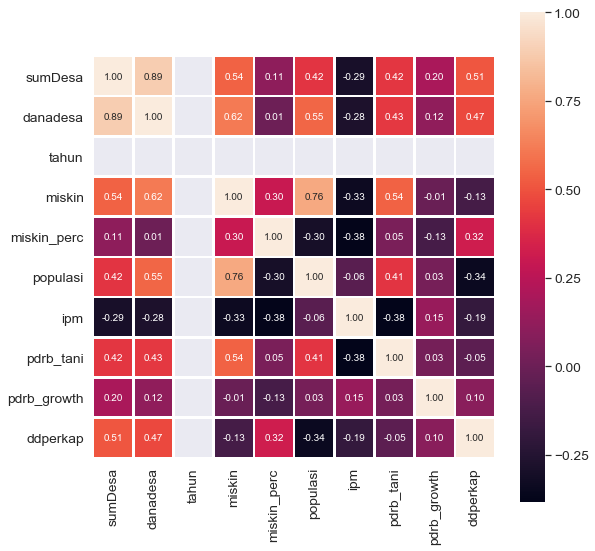

In [17]:
plt.figure(figsize=(9, 9))
sns.set(font_scale=1.25)
sns.heatmap(t2015.corr(), linewidths=1.5, annot=True, square=True, 
                fmt='.2f', annot_kws={'size': 10}, 
                
            )
plt.show()

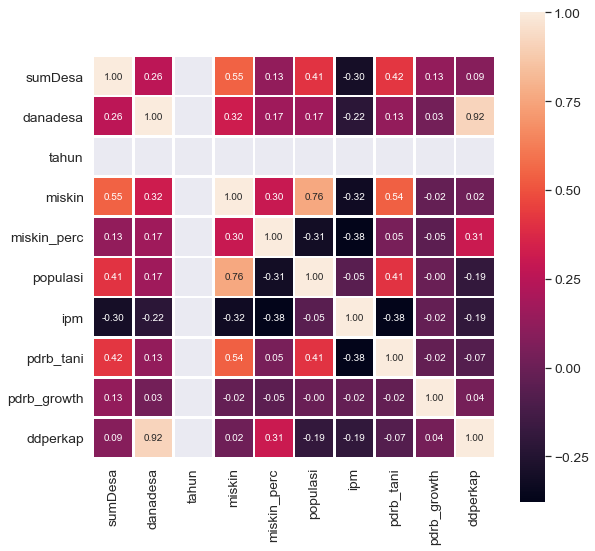

In [18]:
plt.figure(figsize=(9, 9))
sns.set(font_scale=1.25)
sns.heatmap(t2016.corr(), linewidths=1.5, annot=True, square=True, 
                fmt='.2f', annot_kws={'size': 10}, 
                
            )
plt.show()

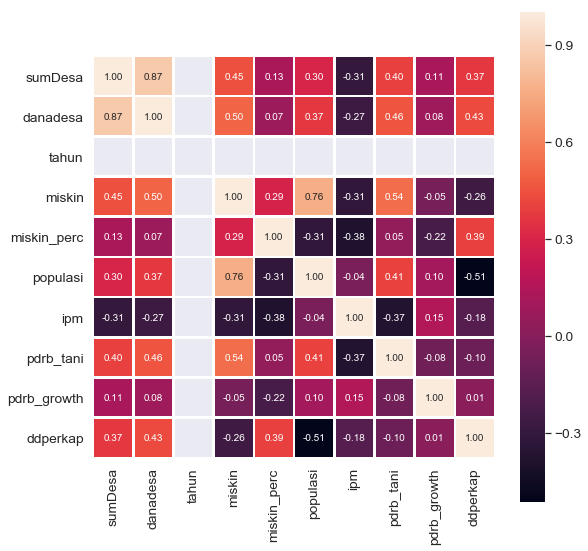

In [19]:
plt.figure(figsize=(9, 9))
sns.set(font_scale=1.25)
sns.heatmap(t2017.corr(), linewidths=1.5, annot=True, square=True, 
                fmt='.2f', annot_kws={'size': 10}, 
                
            )
plt.show()

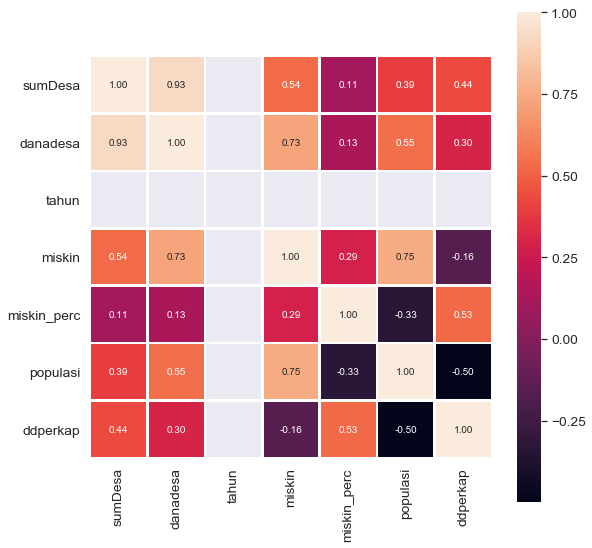

In [20]:
plt.figure(figsize=(9, 9))
sns.set(font_scale=1.25)
sns.heatmap(t2018.corr(), linewidths=1.5, annot=True, square=True, 
                fmt='.2f', annot_kws={'size': 10}, 
                
            )
plt.show()

Skewness: 0.721858
Kurtosis: 2.157268


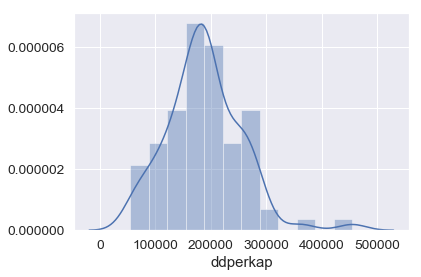

In [21]:
    sns.distplot(t2018["ddperkap"]);
    # skewness and kurtosis
    print("Skewness: %f" % t2018["ddperkap"].skew())
    print("Kurtosis: %f" % t2018["ddperkap"].kurt())


Skewness: -0.762583
Kurtosis: 0.963129


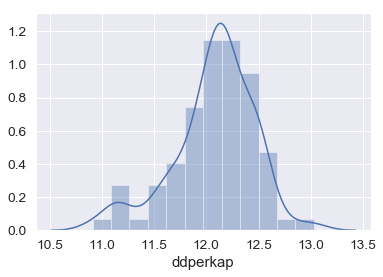

In [22]:
sns.distplot(np.log(t2018['ddperkap']));
#skewness and kurtosis
print("Skewness: %f" % np.log(t2018['ddperkap']).skew())
print("Kurtosis: %f" % np.log(t2018['ddperkap']).kurt())

Skewness: 0.705894
Kurtosis: 1.235856


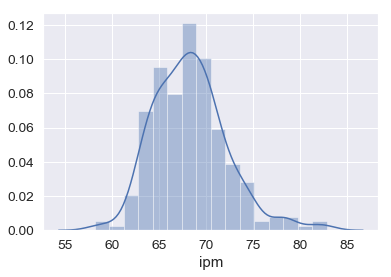

In [23]:
sns.distplot(pake['ipm']);
#skewness and kurtosis
print("Skewness: %f" % pake['ipm'].skew())
print("Kurtosis: %f" % pake['ipm'].kurt())

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Skewness: 0.484276
Kurtosis: 0.821261


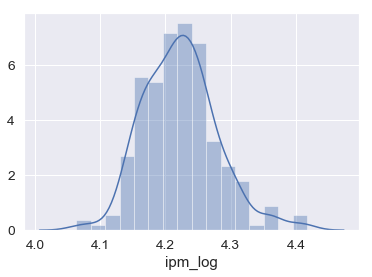

In [24]:
pake['ipm_log'] = np.log(pake['ipm'])

sns.distplot(pake['ipm_log']);
# skewness and kurtosis
print("Skewness: %f" % pake['ipm_log'].skew())
print("Kurtosis: %f" % pake['ipm_log'].kurt())
# dropping old column

Skewness: 0.158271
Kurtosis: 9.569878


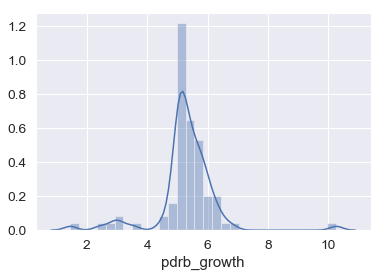

In [25]:
sns.distplot(t2017['pdrb_growth']);
# skewness and kurtosis
print("Skewness: %f" % t2017['pdrb_growth'].skew())
print("Kurtosis: %f" % t2017['pdrb_growth'].kurt())
# dropping old column

Skewness: 2.591706
Kurtosis: 9.649396


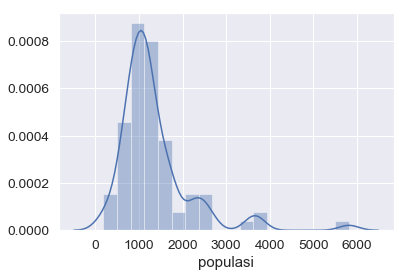

In [26]:
sns.distplot(t2018['populasi']);
#skewness and kurtosis
print("Skewness: %f" % t2018['populasi'].skew())
print("Kurtosis: %f" % t2018['populasi'].kurt())

Skewness: -0.244630
Kurtosis: 2.337419


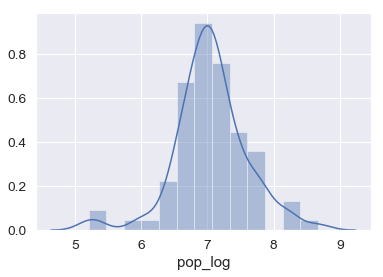

In [27]:
t2018['pop_log'] = np.log(t2018['populasi'])

sns.distplot(t2018['pop_log']);
# skewness and kurtosis
print("Skewness: %f" % t2018['pop_log'].skew())
print("Kurtosis: %f" % t2018['pop_log'].kurt())
# dropping old column

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Skewness: 5.452023
Kurtosis: 57.894634


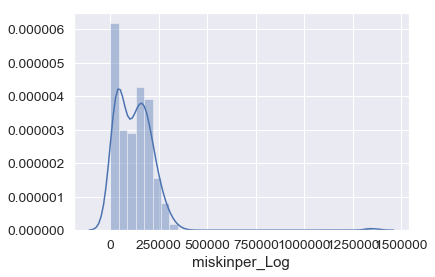

In [28]:
pake['miskinper_Log'] = (pake['danadesa']/pake['populasi'])

sns.distplot(pake['miskinper_Log']);
# skewness and kurtosis
print("Skewness: %f" % pake['miskinper_Log'].skew())
print("Kurtosis: %f" % pake['miskinper_Log'].kurt())

In [29]:
numerical_feats = data.dtypes[data.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

Number of Numerical features:  9


In [30]:
print(data[numerical_feats].columns)
print("*"*100)

Index(['sumDesa', 'danadesa', 'tahun', 'miskin', 'miskin_perc', 'populasi',
       'ipm', 'pdrb_tani', 'pdrb_growth'],
      dtype='object')
****************************************************************************************************


In [32]:

data[numerical_feats].head()

,sumDesa,danadesa,tahun,miskin,miskin_perc,populasi,ipm,pdrb_tani,pdrb_growth
0,340,53680341,2015,126.42,9.97,1268.004012,62.030000,4436.20,6.20
1,326,51469974,2015,124.42,10.43,1192.905081,62.720000,5067.20,5.81
2,326,51469974,2015,74.85,5.09,1470.530452,64.610000,3954.27,5.09
3,246,38839306,2015,191.12,5.71,3347.110333,70.050000,4784.90,5.60
4,270,54265335,2015,281.04,8.00,3513.000000,70.048031,4863.23,5.89


In [33]:
plt.rcParams['figure.figsize'] = (10.0, 8.0)

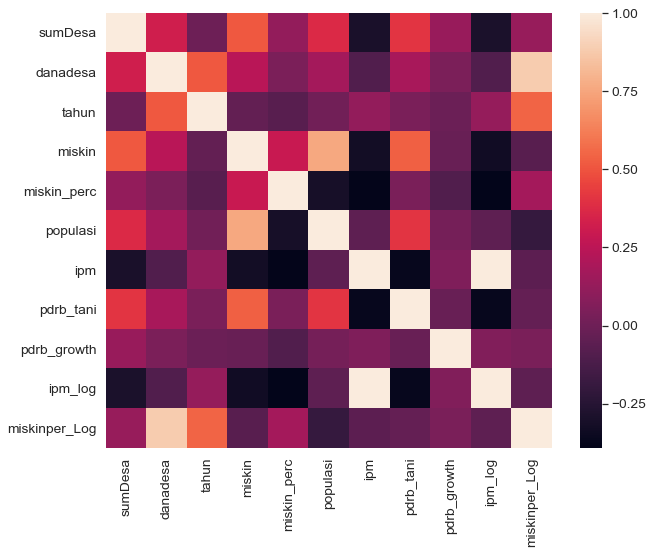

In [34]:
sns.heatmap(pake.corr())

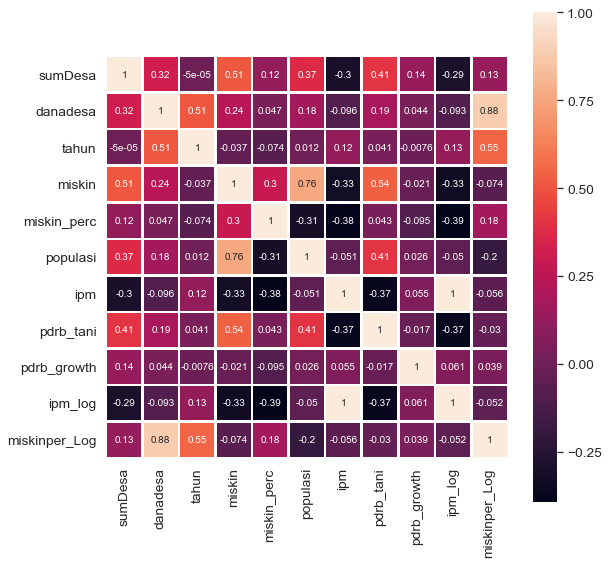

In [35]:
plt.figure(figsize=(9, 9))
sns.set(font_scale=1.25)
sns.heatmap(pake.corr(), linewidths=1.5, annot=True, square=True, 
                 annot_kws={'size': 10}, 
                
            )
plt.show()